# Introduction

* Welcome to the **Secure Development Environment** hands-on lab. 
* In this lab, you will learn how to make your development environment more secure by encrypting secrets like credentials and API keys so that they are not stored in the clear.

# Learning Objectives

In this lab, you will:
* Install the **`pass`** secrets manager utility
* Initialize **`pass`** with a Gnu Privacy Guard (GPG) key
* Securely store secrets using the **`pass`** CLI (command-line-interface)
* Retrieve stored secrets using the **`pass`** CLI (command-line-interface)
* Clean up **`pass`** to secure your computer

# What is a Secure Development Environment?

As a developer, you must ensure that security isn't an afterthought in your application's development process. 
* Security should be included throughout the software development lifecycle (SDLC), but it isn't enough.
* If the development environment isn't secure, it's difficult to accept that code developed there is also secure. 

There are several simple steps you can use to secure your development environment against risk:

* Securely storing secrets required for your production application.
* Secure the internet connection. Use a VPN, if necessary.
* Implement a firewall with strong ingress/egress policies.
* Regularly check for open ports and closing ports not needed.
* Use Docker containers for development, if possible, and use separate computers for development tasks and business tasks.
* Logging the behaviors in your developer's environments.
* Use multifactor authentication to prevent identity theft.
* Add additional security for developers who need to access the production environment from their developer machines.
* Track all commits and changes made by developers, for future reference, in case problems arise.

# Prerequisites

* Developers require secrets like credentials for cloud API keys and other passwords to work with the computers they use daily. 
* However, not every developer understands how to protect and keep these secrets secure.
* Suppose you were a developer following insecure code practices. 
* You have a file called `insecure.txt` that insecurely stores important passwords in plain text.

Let's download the insecure secrets file needed for this lab.

# Your Task

1. Open a terminal from the top menu bar with `Terminal > New Terminal` and make sure that you are in the `/home/project` folder.

```
cd /home/project
```

2. Run the following **`wget`** command to acquire the file needed for the lab:

```
wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-CD0267EN-SkillsNetwork/labs/module4/data/insecure.txt -O ~/insecure.txt
```

3. Run the following **`cat`** command to view the file contents:

```
$ cat ~/insecure.txt

IBM_CLOUD_API_KEY="OebUkIcSk9KbpeXnZ0z5bKiAj2G5uHeEgq49xd9vEXM"
PROD_ADMIN_PASS="UbJCN5dL46eNE6ecULp9DtNiQLWSxKxpZ6u3BzRsBKI"
```

* As you can see, the file is storing important secrets in plain text. 
* This is certainly not a desirable situation. In the next section, you'll learn how to securely store these secrets using **`pass`**.

# Step 1: Securing the secrets using pass

* In this step, we will download and install a Linux-based password manager called **`pass`**. 
* We will use **`pass`** to generate a secret Gnu Privacy Guard (GPG) key and use it to create a credential store locally on your computer.
* The **`pass`** will allow you to store your secrets securely.

## Your Task

1. First, install pass in your environment by running the following Linux commands in the command prompt:

```
sudo apt update
sudo apt install -y pass
```

2. Next, use the **`gpg`** command to generate a secret GPG key on your local machine.

```
gpg --full-generate-key
```

* Follow all of the installation prompts until the installation and configuration process is complete.
* Press **`[enter]`** to accept the default options for the key type, and the other remaining settings.
* Then press **`y`** to confirm.
* Further, enter your Real name, Email Address, and any Comment.
* Then press **`O`**(for Okay).
    
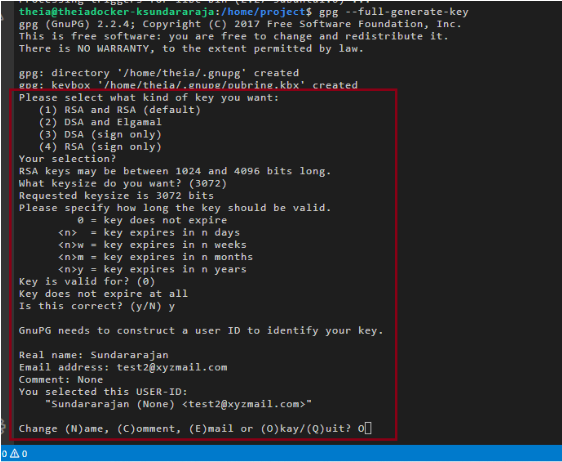
    
**Then enter a passphrase which is recommended to have at least 8 characters and contain at least 1 digit or special character**
    
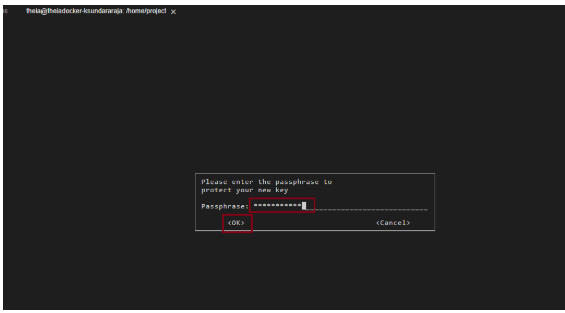

3. With this, your GPG key will be generated.

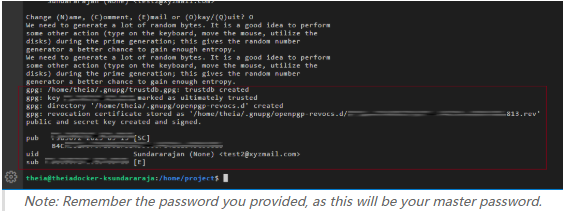

```
gpg: /home/theia/.gnupg/trustdb.gpg: trustdb created
gpg: key 8C3A74BC7F69DE3E marked as ultimately trusted
gpg: directory '/home/theia/.gnupg/openpgp-revocs.d' created
gpg: revocation certificate stored as '/home/theia/.gnupg/openpgp-revocs.d/446E55DC23B5A6D02A2C697E8C3A74BC7F69DE3E.rev'
public and secret key created and signed.

pub   rsa3072 2025-02-12 [SC]
      446E55DC23B5A6D02A2C697E8C3A74BC7F69DE3E
uid                      Kiranmoy paul (Nothing) <test@email.com>
sub   rsa3072 2025-02-12 [E]
```

**MASTER PASSWORD**: `test1234`

# Step 2: Initializing Pass

Now that we have generated a GPG key, we can initialize **`pass`** with the GPG ID.

This step only needs to be performed once. Then you can save as many secrets as needed afterwards.

## Your Task

1. Use the ID of the GPG key you created in **Step 1**.

```
gpg --list-secret-keys --keyid-format LONG | grep sec
```

In the resulting output, you'll see a line resembling the following:

```
sec   rsa2048/ABCDEFGH01234567 2019-07-31 [SC]
```

* This is the line that contains your GPG key ID.
* In this example, the GPG key ID is **`ABCDEFGH01234567`**. 
* Copy your key's ID to the clipboard.

2. Use the **`pass init`** command to initialize **`pass`** with your GPG key ID.

```
pass init {paste your gpg key here}
```

> **Note**: You must paste your GPG ID where it says **`{paste your gpg key here}`** but you don't need to include the curly braces around your GPG ID.

## Results

You should see output similar to the one displayed below (but with your GPG key):

```
$ pass init ABCDEFGH01234567
Password store initialized for ABCDEFGH01234567
```

* That's all there is to it! You have successfully initialized **`pass`**.
* Next, you'll learn how to store and retrieve secrets.

# Step 3: Creating secrets

* Now you're ready to create secrets and store them securely.
* In this step, you'll use the **`pass insert`** command to insert secrets into the secrets manager key store.

## Your Task 1

1. Run the following command to obtain the value for the key **`IBM_CLOUD_API_KEY`** from the **`~/insecure.txt`** file:

```
cat ~/insecure.txt| grep IBM_CLOUD_API_KEY | grep -o "\".*" | grep -o "[a-z,A-Z,0-9]*"
```

> Executing the command will return the value you'll use for the next command in **Step 2**.

2. Run the following command to create a new secret called **`IBM_CLOUD_API_KEY`** in **`pass`**:

```
pass insert IBM_CLOUD_API_KEY
```

3. Copy and paste the value for **`IBM_CLOUD_API_KEY`** you obtained in **Step 1**.

> Note:
> * For this step, **`pass`** will not display the secret when you paste or type it into the command prompt.
> * You'll be prompted to paste the value into the command prompt twice to confirm that both values are the same.

## Your Task 2

Let’s create another secret for the password store.

1. Run the command to obtain the value for the key. (This is the same procedure you followed in **Step 1** on the previous page). This time, you'll use **`PROD_ADMIN_PASS`** for the new secret. Run the following command in the command prompt and copy the output to the clipboard:

```
cat ~/insecure.txt| grep PROD_ADMIN_PASS | grep -o "\".*" | grep -o "[a-z,A-Z,0-9]*"
```

2. Insert a new secret **`PROD_ADMIN_PASS`**:

```
pass insert PROD_ADMIN_PASS
```

3. Paste the value for **`PROD_ADMIN_PASS`** into the command prompt.

> **Note**:
> * For this step, **`pass`** will not display the secret when you paste or type it into the command prompt.
> * You'll be prompted to paste the value into the command prompt twice to confirm that both values are the same.

Now you can use the passwords whenever you need them!

In the next part of the lab, you'll learn how to retrieve the stored passwords.

# Step 4: Retrieving secrets

Now that you've created a few secrets, it's time to learn how to retrieve them when needed.

## Your Task

Your task is to verify that the secrets are stored in **`pass`**.

1. Let's use the **`show`** command to display the **`IBM_CLOUD_API_KEY`** with **`pass`** to verify that the secret was inserted properly:

```
pass show IBM_CLOUD_API_KEY
```

* You may be asked to enter your master password (GPG key). 
* If so, enter it and continue. Of course, you can perform this same procedure for any password you saved with **`pass`**.

2. Let's show the **`IBM_CLOUD_API_KEY`** with **`pass`** to verify the secret was inserted properly:

```
pass show PROD_ADMIN_PASS
```

* The **`pass`** makes it easy to retrieve stored secrets. 
* Entering your GPG password, when prompted, allows **`pass`** to display them for you. 
* If an attacker or others gain access to your computer, they can't access your passwords or stored secrets since they won't know what your GPG password is.

# Step 5: Cleaning up

## Clean up

There is one final step in this lab to secure your development environment.

Now that your passwords are securely stored with **`pass`**, the final step is to delete the **`~/insecure.txt`** file.

Run the following command to remove the file containing the passwords saved in plain text:

```
rm ~/insecure.txt
```

Now your passwords are securely stored with **`pass`**!

## Accessing your secrets

Whenever you need to access an important secret for development, simply run the following command:

```
pass show [SECRET_KEY_NAME]
```

# Conclusion

**Congratulations!**

You have learned how **`pass`** can help you harden your development environment by storing secrets securely so only you can access them. 
* The **`pass`** application encrypts your password information with GPG, a seasoned cryptography software. 
* Secrets are secure because every password is encrypted behind your master password - which should only be known by you.

In this hands-on lab, you learned how to install, configure, and initialize **`pass`**. 
* You also learned how to securely store secrets using the **`pass`** command line interface (CLI).
* You learned how to retrieve your secrets from **`pass`** and how to clean up **`pass`** to secure your computer.

# Next steps

* Some recommended next steps would be to try installing **`pass`** on your computer to create and retrieve some secrets. 
* You can also visit the following resource: **[Secure Your Development Environment](https://github.com/ukncsc/secure-development-and-deployment/blob/master/4-secure-your-development-environment.md)** to learn more about other methods you can use for mitigating risk during development and deployment.